0.23987916111946106


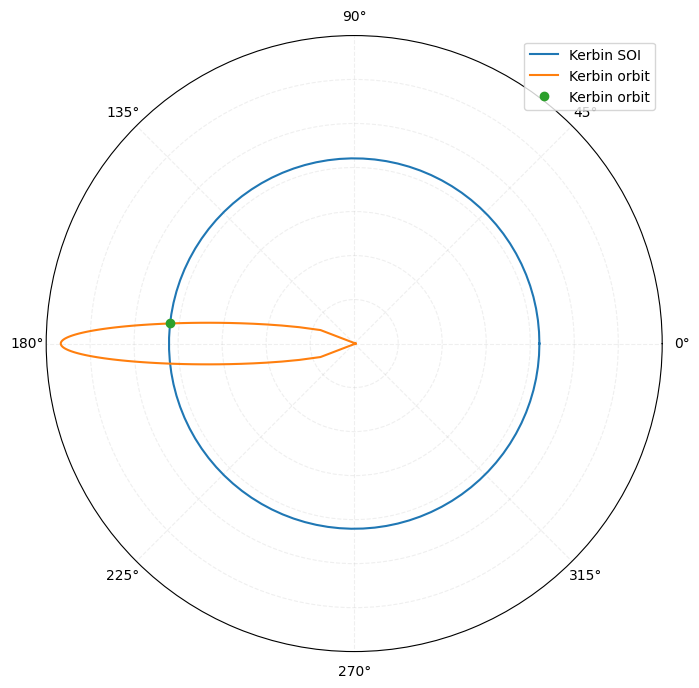

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import KSP_module as ksp

HKO = ksp.orbit(Kerbin, min_alt = 70000.1, e=0.99)
t_leave = HKO.calc_soi_leave_time(0)

fig,ax = ksp.initialize_plot()
ax = ksp.add_soi_to_plot(ax, Kerbin, 0, True, True)
ax = ksp.add_orbit_to_plot(ax, HKO)
ax = ksp.add_orbit_point_to_plot(ax, HKO, t_leave)
print(HKO.primary.soi - HKO.calc_polar(t_leave)[0])

1788.187607777873


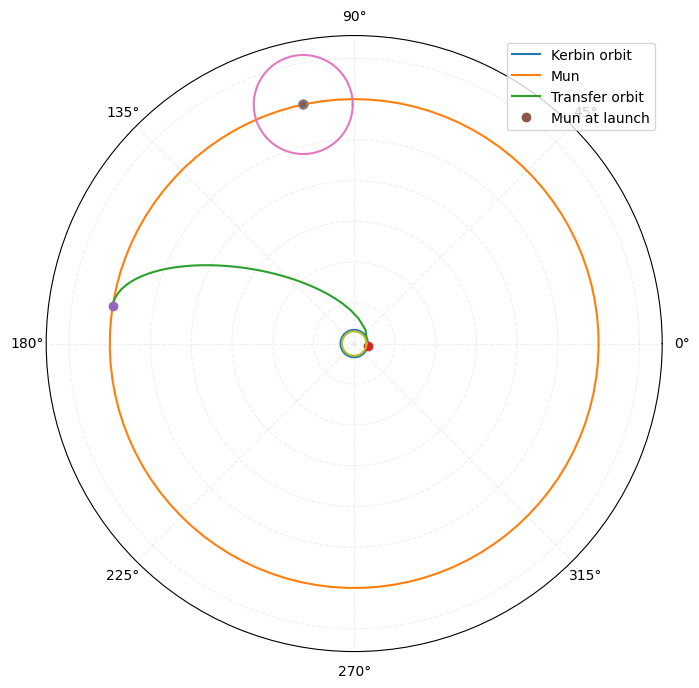

['Y1 D1 00:29:48', np.float64(1788.187607777873)]


In [2]:
from KSP_module import Kerbol, Kerbin, Duna, Eve, Mun, Minmus
LKO = ksp.orbit(Kerbin, min_alt = 70000.1, e=0)
transfer3 = ksp.calc_window(LKO, Mun.orbit, 0)
fig,ax = ksp.plot_hohmann_orbit(LKO, Mun, transfer3)

print(transfer3.t_launch)
ax = ksp.add_soi_to_plot(ax, Mun, transfer3.t_launch)
ax = ksp.add_planetary_body_to_plot(ax, Mun, transfer3.t_launch)
ax = ksp.add_planetary_body_to_plot(ax, Kerbin, transfer3.t_launch, True)
plt.show()
print([ksp.pretty_date(transfer3.t_launch), transfer3.t_launch])

In [ ]:
def calc_soi_change(self, t_start):
    """Calculate the time of SOI change and the new primary
    Args:
        t0: start time of calculation
    Returns:
        t_change: time of SOI change
        new_primary: new primary body"""
    
    # if the orbit is  hyperbolic or highly eccentric, 
    # calculate time when leaving primary SOI 
    if self.check_hyperbolic() or self.ra > self.primary.soi:
        t_end = t_start + self.calc_soi_leave_time()
    # if elliptic and fully inside SOI, calc is for one orbit starting at t0
    else:
        t_end = t_start + self.T
    
    # calculate minimum distance to all secondaries during transit time
    closest_secondary = None
    t_soi_change = t_end
    for secondary in self.primary.secondaries:
        t_min,d_min = self.calc_min_distance(secondary, t_start, t_end)
        if d_min < secondary.soi:
            t_soi, d_soi = self.calc_soi_enter(secondary, t_start, t_min)
            if t_soi < t_soi_change:
                t_soi_change = t_soi
                closest_secondary = secondary
    return t_soi_change, closest_secondary

def calc_soi_enter(self, secondary, t_start, t_min):
    """Calculate the time of entering a secondary's SOI
    Args:
        secondary: secondary body
        t_start: start time of calculation
        t_min: time of minimum distance to secondary
    Returns:
        t_soi: time of SOI change
    """
    
    t1 = t_start
    t2 = t_min
    while abs(t2-t1) > 1:
        t = (t1 + t2)/2
        if self.calc_distance_to(secondary, t) < secondary.soi:
            t2 = t
        else:
            t1 = t
    return t
